# Graphs used in the paper

The graphs used in the paper are rendered below. 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import random

from matplotlib.patches import ConnectionPatch

%matplotlib inline

## Figure 1 - 

A simple phylogenetic tree. 

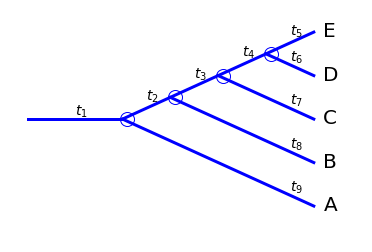

In [3]:
fig1 = plt.figure()

ax = fig1.add_subplot(111)
ax.set_ylim((0, 10))
ax.set_xlim((0, 7))

lines = [[[0, 2], [5, 5]],
         [[2, 6], [5, 9]],
         [[2, 6], [5, 1]],
         [[3, 6], [6, 3]],
         [[4, 6], [7, 5]],
         [[5, 6], [8, 7]]
        ]
for line in lines:
    ax.plot(line[0], line[1], linewidth=3, color='blue')
    
    x = np.sum(line[0])/2
    y = np.sum(line[1])/2

# Plot annotations:

ax.annotate('$t_1$', (1  , 5.2), size=14)
ax.annotate('$t_2$', (2.5, 5.9), size=14)
ax.annotate('$t_3$', (3.5, 6.9), size=14)
ax.annotate('$t_4$', (4.5, 7.9), size=14)
ax.annotate('$t_5$', (5.5, 8.9), size=14)
ax.annotate('$t_6$', (5.5, 7.7), size=14)
ax.annotate('$t_7$', (5.5, 5.7), size=14)
ax.annotate('$t_8$', (5.5, 3.7), size=14)
ax.annotate('$t_9$', (5.5, 1.7), size=14)

ax.annotate('A', (6.2,  .8), size=20)
ax.annotate('B', (6.2, 2.8), size=20)
ax.annotate('C', (6.2, 4.8), size=20)
ax.annotate('D', (6.2, 6.8), size=20)
ax.annotate('E', (6.2, 8.8), size=20)

ax.plot(2.1, 5, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(3.1, 6, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(4.1, 7, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')
ax.plot(5.1, 8, marker='o', markersize=14, markeredgecolor='blue', markerfacecolor='none')

ax.axis('off')
fig1.savefig('AncillaryFiles\\figure1.eps', format='eps', dpi=1000, bbox_inches='tight')

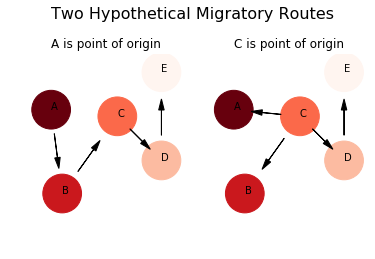

In [4]:
# Let's try a side-by-side plot... 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

dx=[]
dy=[]
zx=[]
zy=[]

for i in range(0,len(x)-1):
    Dx = x[i+1] - x[i]
    Dy = y[i+1] - y[i]
    
    zx.append(x[i] + Dx/sf)
    zy.append(y[i] + Dy/sf)
    
    dx.append(Dx/sf)
    dy.append(Dy/sf)

s=[100,80,60,40,20]

myfig = plt.figure()                 # The figure is a figure
mypic = myfig.add_subplot(121, aspect='equal')       # mypic is a subplot added to the figure
mypic.axis('off')                    # turns subplot axes off
mypic.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot
mypic.scatter(3, 2.6, s=0)
# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)
    
# Here is a sample locational plot of the groups. 

x=[3,3.1,3.6,4,4]
y=[3.66,2.9,3.6,3.2,4]
name=['A','B','C','D','E']

# Shrink factor - 

sf = 3.5

# Arrows have to be done manually for second example:

dx=[(x[0]-x[2])/sf,(x[1]-x[2])/sf,(x[3]-x[2])/sf,(x[4]-x[3])/sf]
dy=[(y[0]-y[2])/sf,(y[1]-y[2])/sf,(y[3]-y[2])/sf,(y[4]-y[3])/sf ]
zx=[x[2] + (x[0]-x[2])/sf,x[2] + (x[1]-x[2])/sf,x[2] + (x[3]-x[2])/sf,x[3] + (x[4]-x[3])/sf]
zy=[y[2] + (y[0]-y[2])/sf,y[2] + (y[1]-y[2])/sf,y[2] + (y[3]-y[2])/sf,y[3] + (y[4]-y[3])/sf]

s=[100,80,60,40,20]

mypic2 = myfig.add_subplot(122, aspect='equal')       # mypic is a subplot added to the figure
mypic2.axis('off')                    # turns subplot axes off

mypic2.scatter(x, y, c=s, s=1500, cmap="Reds")  #makes the subplot a scatterplot
mypic2.scatter(3, 2.6, s=0)
# Not working...a better approach might be to handle this differently.
for i, txt in enumerate(name):
    mypic2.annotate(name[i], (x[i],y[i]))     #annotates the figure

for i in range(0,len(x)-1):
    mypic2.arrow(zx[i], zy[i], dx[i], dy[i], fc="k", ec="k", head_width=0.05, head_length=0.1)

myfig.suptitle('Two Hypothetical Migratory Routes', fontsize=16)
mypic.set_title('A is point of origin')
mypic2.set_title('C is point of origin')

myfig.savefig('AncillaryFiles\\figure2.eps', format='eps', dpi=1000)

# Simulating stochastic differential equations

In [5]:
sigma = .51
r     = 2
tau   = .5
K     = 3

thresh = 2.5
drop   = .4

dt    = .005
T     = 1
n     = int(T/dt)
t     = np.linspace(0., T, n)

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt    = np.sqrt(dt)

random.seed(41)

x = np.zeros(n)
x[0] = 1
breached = 0

for i in range(n - 1):
    x[i + 1] = x[i] + dt * r * x[i]*(1 - x[i] / K) + x[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (x[i + 1] >= thresh) & (breached == 0):
        xtime = i
        x[i + 1] = thresh/2
        K = drop
        breached = 1

y    = np.zeros(n)
y[0] = 1.25        
K    = 3
breached = 0
random.seed(30)

for i in range(n - 1):
    y[i + 1] = y[i] + dt * r * y[i]*(1 - y[i] / K) + y[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (y[i + 1] >= thresh) & (breached == 0):
        ytime = i
        y[i + 1] = thresh/2
        K = drop    
        breached = 1

z    = np.zeros(n)
z[0] = 1.25        
K    = 3
breached = 0
random.seed(6698)

for i in range(n - 1):
    z[i + 1] = z[i] + dt * r * z[i]*(1 - z[i] / K) + z[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (z[i + 1] >= thresh) & (breached == 0):
        ztime = i
        z[i + 1] = thresh/2
        K = drop    
        breached = 1

w    = np.zeros(n)
w[0] = 1.25        
K    = 3
breached = 0
random.seed(61)      
        
for i in range(n - 1):
    w[i + 1] = w[i] + dt * r * w[i]*(1 - w[i] / K) + w[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (w[i + 1] >= thresh) & (breached == 0):
        w[i + 1] = thresh/2
        K = drop    
        breached = 1    

        
# Data for exponential density:

lam =4.5
xpts = np.arange(0,n)/n
ppts = lam*np.exp(-lam*xpts)

Text(6.5,7.5,'D')

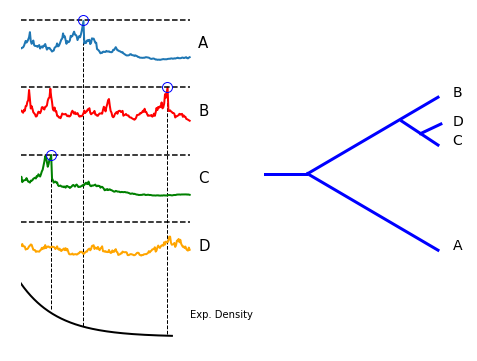

In [6]:
fig = plt.figure(figsize=(8,6))

gs = gridspec.GridSpec(5, 2)

ax1 = plt.subplot(gs[0,0])
ax1.plot(t, x, lw=2)
ax1.plot([0,1],[thresh,thresh], linestyle='dashed', color='black')
ax1.axis('off')
an1 = ax1.annotate('A', xy=(1.05,1), size=15)
ax1.set_xlim([0, 1.2])
ax1.set_ylim([0,thresh + .5])

ax2 = plt.subplot(gs[1,0])
ax2.plot(t, y, lw=2, color='red')
ax2.plot([0,1],[thresh,thresh], linestyle='dashed', color='black')
ax2.axis('off')
an2 = ax2.annotate('B', xy=(1.05,1), size=15)
ax2.set_xlim([0, 1.2])
ax2.set_ylim([0, thresh + .5])

ax3 = plt.subplot(gs[2,0])
ax3.plot(t, z, lw=2, color='green')
ax3.plot([0,1],[thresh,thresh], linestyle='dashed', color='black')
ax3.axis('off')
an3 = ax3.annotate('C', xy=(1.05,1), size=15)
ax3.set_xlim([0, 1.2])
ax3.set_ylim([0, thresh + .5])

ax4 = plt.subplot(gs[3,0])
ax4.plot(t, w, lw=2, color='orange')
ax4.plot([0,1],[thresh,thresh], linestyle='dashed', color='black')
ax4.axis('off')
an4 = ax4.annotate('D', xy=(1.05,1), size=15)
ax4.set_xlim([0, 1.2])
ax4.set_ylim([0, thresh + .5])

# Circles for the hit points:

ax1.plot(xtime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')
ax2.plot(ytime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')
ax3.plot(ztime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')

# Exp. Density

ax5 = plt.subplot(gs[4,0])
ax5.plot(xpts, ppts, lw=2, color='black')
ax5.axis('off')
an5 = ax5.annotate('Exp. Density', xy=(1.1,1))
ax5.set_xlim([.10, 1.3])
ax5.set_ylim([0, thresh + .5])

ax1.axvline(x=xtime*dt, ymin=-4.6, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax2.axvline(x=ytime*dt, ymin=-3.55, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax3.axvline(x=ztime*dt, ymin=-1.9, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax6 = plt.subplot(gs[1:-1, 1])
ax6.set_ylim((0, 10))
ax6.set_xlim((0, 7))
ax6.axis('off')


lines = [[[0,1.45], [5,5]],
         [[1.5,6], [5,9]],
         [[1.5,6], [5,1]],
         [[4.75,6], [7.75,6.5]],
         [[5.4,6.1], [7.1,7.6]]]

for line in lines:
    ax6.plot(line[0], line[1], linewidth=3, color='blue', zorder=0) 
    
ax6.annotate('A', xy=(6.5,1), size=14)  
ax6.annotate('B', xy=(6.5,9), size=14)
ax6.annotate('C', xy=(6.5,6.5), size=14)
ax6.annotate('D', xy=(6.5,7.5), size=14)

In [7]:
sigma = .51
r     = 2
tau   = .5
K     = 3

thresh = 2.5
drop   = .4

dt    = .0015
T     = 1
n     = int(T/dt)
t     = np.linspace(0., T, n)

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt    = np.sqrt(dt)

random.seed(41)

x = np.zeros(n)
x[0] = 1
breached = 0

for i in range(n - 1):
    x[i + 1] = x[i] + dt * r * x[i]*(1 - x[i] / K) + x[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (x[i + 1] >= thresh) & (breached == 0):
        xtime = i
        x[i + 1] = thresh/2
        K = drop
        breached = 1

y    = np.zeros(n)
y[0] = 1.25        
K    = 3
breached = 0
random.seed(30)

for i in range(n - 1):
    y[i + 1] = y[i] + dt * r * y[i]*(1 - y[i] / K) + y[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (y[i + 1] >= thresh) & (breached == 0):
        ytime = i
        y[i + 1] = thresh/2
        K = drop    
        breached = 1

z    = np.zeros(n)
z[0] = 1.25        
K    = 3
breached = 0
random.seed(6698)

for i in range(n - 1):
    z[i + 1] = z[i] + dt * r * z[i]*(1 - z[i] / K) + z[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (z[i + 1] >= thresh) & (breached == 0):
        ztime = i
        z[i + 1] = thresh/2
        K = drop    
        breached = 1

w    = np.zeros(n)
w[0] = 1.25        
K    = 3
breached = 0
random.seed(61)      
        
for i in range(n - 1):
    w[i + 1] = w[i] + dt * r * w[i]*(1 - w[i] / K) + w[i]**2 * sigma_bis * sqrtdt * random.normalvariate(0, 1)
    if (w[i + 1] >= thresh) & (breached == 0):
        w[i + 1] = thresh/2
        K = drop    
        breached = 1    

        
# Data for exponential density:

lam =4.5
xpts = np.arange(0,n)/n
ppts = lam*np.exp(-lam*xpts)

# Trim down the graphs

y  = y[:n-xtime]
yt = np.arange(0, n-xtime) * dt 

z  = z[:n-xtime-ytime]
zt = np.arange(0, n-xtime-ytime) * dt

w  = w[:n-xtime-ytime-ztime]
wt  = np.arange(0,n-xtime-ytime-ztime)*dt

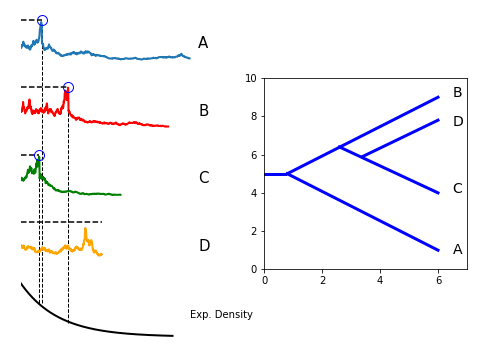

In [8]:
fig = plt.figure(figsize=(8,6))

gs = gridspec.GridSpec(5, 2)

ax1 = plt.subplot(gs[0,0])
ax1.plot(t, x, lw=2)
ax1.plot([0,xtime*dt],[thresh,thresh], linestyle='dashed', color='black')
ax1.axis('off')
an1 = ax1.annotate('A', xy=(1.05,1), size=15)
ax1.set_xlim([0, 1.2])
ax1.set_ylim([0,thresh + .5])

ax2 = plt.subplot(gs[1,0])
ax2.plot(yt, y, lw=2, color='red')
ax2.plot([0,ytime*dt],[thresh,thresh], linestyle='dashed', color='black')
ax2.axis('off')
an2 = ax2.annotate('B', xy=(1.05,1), size=15)
ax2.set_xlim([0, 1.2])
ax2.set_ylim([0, thresh + .5])

ax3 = plt.subplot(gs[2,0])
ax3.plot(zt, z, lw=2, color='green')
ax3.plot([0,ztime*dt],[thresh,thresh], linestyle='dashed', color='black')
ax3.axis('off')
an3 = ax3.annotate('C', xy=(1.05,1), size=15)
ax3.set_xlim([0, 1.2])
ax3.set_ylim([0, thresh + .5])

ax4 = plt.subplot(gs[3,0])
ax4.plot(wt, w, lw=2, color='orange')
ax4.plot([0, (n-xtime-ytime-ztime)*dt], [thresh, thresh], linestyle='dashed', color='black')
ax4.axis('off')
an4 = ax4.annotate('D', xy=(1.05,1), size=15)
ax4.set_xlim([0, 1.2])
ax4.set_ylim([0, thresh + .5])

# Circles for the hit points:

ax1.plot(xtime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')
ax2.plot(ytime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')
ax3.plot(ztime*dt, thresh, marker='o', markersize=10, markeredgecolor='blue', markerfacecolor='none')

# Exp. Density

ax5 = plt.subplot(gs[4,0])
ax5.plot(xpts, ppts, lw=2, color='black')
ax5.axis('off')
an5 = ax5.annotate('Exp. Density', xy=(1.1,1))
ax5.set_xlim([.10, 1.3])
ax5.set_ylim([0, thresh + .5])

ax1.axvline(x=xtime*dt, ymin=-4.2, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax2.axvline(x=ytime*dt, ymin=-3.35, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax3.axvline(x=ztime*dt, ymin=-1.8, ymax=.8, c='black', lw=1, linestyle='dashed', 
        zorder=0, clip_on=False)

ax6 = plt.subplot(gs[1:-1, 1])
ax6.set_ylim((0, 10))
ax6.set_xlim((0, 7))
#ax6.axis('off')


lines = [[[0,.72], [5,5]],
         [[.8,6], [5,9]],
         [[.8,6], [5,1]],
         [[2.6,6], [6.4,4]],
         [[3.4,6], [5.9,7.8]]]

for line in lines:
    ax6.plot(line[0], line[1], linewidth=3, color='blue', zorder=0) 
    
an6 = ax6.annotate('A', xy=(6.5, .8), size=14)  
an6 = ax6.annotate('B', xy=(6.5, 9), size=14)
an6 = ax6.annotate('C', xy=(6.5, 4), size=14)
an6 = ax6.annotate('D', xy=(6.5, 7.5), size=14)

fig.savefig('AncillaryFiles\\figure3.eps', format='eps', dpi=1000)

# Additional Examples

Some additional examples are as follows:

[[0, 1], [6, 6]]
[[1, 7], [6, 11]]
[[1, 7], [6, 1]]
[[4, 7], [8.5, 6]]
[[4.9, 7], [9.2, 7.5]]
[[5.9, 7], [10, 9.2]]
[[6.5, 7], [9.6, 10]]
[[4.6, 7], [3, 5.25]]
[[5.4, 7], [2.4, 3.9]]
[[6.2, 7], [3.1, 2.5]]
[0.1, 1]
[1.1, 7]
[1.1, 7]
[4.1, 7]
[5.0, 7]
[6.0, 7]
[6.6, 7]
[4.699999999999999, 7]
[5.5, 7]
[6.3, 7]


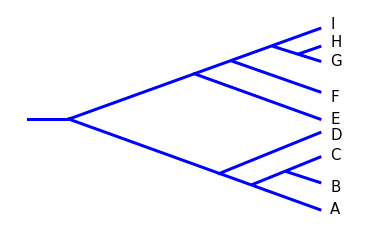

In [49]:
fig1 = plt.figure()

ax = fig1.add_subplot(111)
ax.set_ylim((0, 12))
ax.set_xlim((0, 8))

lines = [ [[0, 1], [6, 6]],
          [[1, 7], [6, 11]],
          [[1, 7], [6, 1]],
          [[4, 7], [8.5, 6]],
          [[4.9, 7], [9.2, 7.5]],
          [[5.9, 7], [10,9.2]],
          [[6.5, 7], [9.6, 10]],
          [[4.6, 7], [3, 5.25]],
          [[5.4, 7], [2.4, 3.9]],
          [[6.2, 7], [3.1, 2.5]]]



for line in lines:
    ax.plot(line[0], line[1], linewidth=3, color='blue')
    print(line)

    
newlines = []    
for line in lines:
    newline = [line[0][0]+.1, line[0][1]]
    newlines.append(newline)

for line in newlines:
    ax.plot(line[0], line[1], linewidth=4, color='red', zorder=0)
    print(line)
    
ax.annotate('A', (7.25,  .8), size=15)
ax.annotate('B', (7.25, 2), size=15)
ax.annotate('C', (7.25, 3.8), size=15)
ax.annotate('D', (7.25, 4.9), size=15)
ax.annotate('E', (7.25, 5.75), size=15)
ax.annotate('F', (7.25,  7), size=15)
ax.annotate('G', (7.25, 9), size=15)
ax.annotate('H', (7.25, 10), size=15)
ax.annotate('I', (7.25, 11), size=15)



ax.axis('off')
fig1.savefig('AncillaryFiles\\example1.eps', format='eps', dpi=1000, bbox_inches='tight')

In [16]:
r1lines = []


for line in lines:
    newline = [line[0], [a + .01 for a in line[1]]]
    r1lines.append(newline)
    


In [36]:
newlines

[[[0.1, 1.1]],
 [[1.1, 7.1]],
 [[1.1, 7.1]],
 [[4.1, 7.1]],
 [[5.0, 7.1]],
 [[6.0, 7.1]],
 [[6.6, 7.1]],
 [[4.699999999999999, 7.1]],
 [[5.5, 7.1]],
 [[6.3, 7.1]]]

In [40]:
for line in newlines:
    print(line[0])

[0.1, 1.1]
[1.1, 7.1]
[1.1, 7.1]
[4.1, 7.1]
[5.0, 7.1]
[6.0, 7.1]
[6.6, 7.1]
[4.699999999999999, 7.1]
[5.5, 7.1]
[6.3, 7.1]
